# Student Details


In [118]:
# NAME: T. MOHAMED NADHIM
# REG. NO: 3122 21 3002 058
# YEAR & DEPT: 3RD YEAR / ECE - A
# ASSIGNMENT: IMPLEMENTATION OF TEACHING AND LEARNING ALGORITHM

In [119]:
#Architecture: 

''' 
    Teaching
    |
    v

    Learning
    |
    v

    Repeat

'''

' \n    Teaching\n    |\n    v\n\n    Learning\n    |\n    v\n\n    Repeat\n\n'

# Installing Libraries

In [120]:
!pip install matplotlib

DEPRECATION: Loading egg at c:\users\nadhi\appdata\local\programs\python\python311\lib\site-packages\object_detection-0.1-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


# Importing Libraries

In [121]:
import math, random
import matplotlib.pyplot as plt

# Defining functions for Griewank Fn, Generating population etc..

In [122]:
#Function to calculate the Griewank Function value for a given list
def griewank(x):
    
    l= len(x)
    sum_val = 0
    cos_prod = 1
    griewank_value = 0

    for i in range(l):
        sum_val += ((x[i]**2)/4000)
        cos_prod *=  math.cos(x[i]/math.sqrt(i+1))
    
    griewank_value = 1 + sum_val - cos_prod

    return griewank_value


In [123]:
#Generates a random population set based on the learner and subject length
def population_generator(learners, subjects, lower_bound, upper_bound):
    
    population = []

    for i in range(learners):
        learner = []
        for i in range(subjects):
            learner.append(round(random.uniform(lower_bound,upper_bound),4))
        population.append(learner)
    
    return population


In [124]:
#Calculates the mean value of each subject, given a population
def mean_of_subjects(population):

    mean_sub = []

    for i in range(subjects):
        mean = []
        for j in range(learners):
            mean.append(population[j][i])
    
        mean_sub.append(round(sum(mean)/len(mean),2))
    
    return mean_sub


In [125]:
#Calculates the objective function values, given a population
def obj_fn_val(population_data):

    obj_val = []

    for i in population_data:
        obj_val.append(round(griewank(i),4))
        
    return obj_val


In [126]:
#Generates random pairs for learners
def generate_pair(learners):
    
    pairs = []

    for i in range(learners):
        pairs.append(random.choice([i+1 for i in range(learners)]))
        
    return pairs

# Teaching Phase Function

In [127]:
#Teaching Phase
def teaching_phase(population, teacher_index):

    teaching_factor = round(1+ random.random()*2 -1) #Teaching Factor

    mean_subjects = mean_of_subjects(population) #Finding mean value for each subject

    random_num_teacher = [round(random.uniform(0,1),2) for i in range(subjects)] #Generating a random number for each subject

    diff_mean = []

    for i in range(subjects):
        diff = random_num_teacher[i]*(population[teacher_index][i] - (teaching_factor*mean_subjects[i])) # Finding Difference_mean
        diff_mean.append(round(diff,4))

    updated_population = population_generator(learners,subjects,lower_bound,upper_bound)


    #Updating the population by adding Diff_mean values
    for i in range(subjects):
        for j in range(learners):
            updated_population[j][i]= population[j][i] + diff_mean[i]
            updated_population[j][i] =  round(updated_population[j][i],4) 
    

    #Finding the objective function values after updating population
    obj_fn_updated = obj_fn_val(updated_population)

    return updated_population, obj_fn_updated


# Learning Phase Function

In [128]:
#Learning Phase
def learning_phase(updated_population, obj_fn_updated):

    learner_updated_population = population_generator(learners,subjects,lower_bound,upper_bound) # type: ignore

    pair = generate_pair(learners) # type: ignore #Generating a learners pair for each learner
    random_num_learner = [round(random.uniform(0,1),2) for i in range(subjects)] #Generating a random number for each subject


    #Updating the population based on learner-learner interaction
    for i in range(learners):
        for j in range(subjects):
            learner_updated_population[i][j] = updated_population[i][j] + (random_num_learner[j]*(updated_population[pair[i]-1][j] - updated_population[i][j]))
            learner_updated_population[i][j] =  round(learner_updated_population[i][j],4)



    #Finding the objective function values after updating population
    obj_fn_learner = obj_fn_val(learner_updated_population)


    #Finding the index of the learner with the biggest reduce in objective function after updating the population
    new_teacher = int()
    ruff = []
    for i in range(len(objective_fn_values)):
        ruff.append(obj_fn_learner[i]-obj_fn_updated[i])
    new_teacher = ruff.index(min(ruff))

    return learner_updated_population, new_teacher, obj_fn_learner
    


# Application of Teaching and Learning Phases

In [129]:
learners = 6 
subjects = 5
lower_bound = -600
upper_bound = 600

iterations = 1000      

population = population_generator(learners,subjects, lower_bound, upper_bound) #Generating the population

objective_fn_values = obj_fn_val(population) #Finding objective function values for the population

teacher = min(objective_fn_values)
teacher_index = objective_fn_values.index(teacher) #Finding the index of the objective function result with least value


#Printing the original population and objective function values
print('Original Population: ')
for i in population:
    print(i)

print()

print('Original Objective function values:')
print(objective_fn_values)

print()
print()
o_values = [] 

for i in range(iterations):

    updated_population, updated_objective_fn = teaching_phase(population,teacher_index)
    learner_updated_population, new_teacher, learner_updated_obj_fn = learning_phase(updated_population, updated_objective_fn)

    population, teacher_index = learner_updated_population, new_teacher 

    o_values.append(min(learner_updated_obj_fn)) #Finding the minimum value of the updated objective function for each iteration



#Printing the Updated population and objective function values
print(f'Updated Population after {iterations} iterations: ')
for i in population:
    print(i)

print()

print(f'Updated Objective function values after {iterations} iterations: ')
print(learner_updated_obj_fn)



Original Population: 
[490.5657, 188.4126, 282.3146, 510.6438, 461.3568]
[-223.0107, 337.7648, 405.0068, 44.166, 82.2387]
[426.6821, -301.316, -23.7, -168.0719, -365.7416]
[480.1568, -390.8601, 205.9992, 70.2363, 33.0015]
[74.4623, -34.7923, 110.4374, -240.6304, 271.9059]
[-585.1011, 413.4076, -413.15, 4.4863, 13.9423]

Original Objective function values:
[208.4472, 85.011, 110.0714, 109.3326, 38.8067, 171.6073]


Updated Population after 1000 iterations: 
[0.0034, 0.0, 0.0051, 0.0, -0.0148]
[0.0034, 0.0, 0.0051, 0.0, -0.0148]
[0.0034, 0.0, 0.0051, 0.0, -0.0148]
[0.0034, 0.0, 0.0051, 0.0, -0.0148]
[0.0034, 0.0, 0.0051, 0.0, -0.0148]
[0.0034, 0.0, 0.0051, 0.0, -0.0148]

Updated Objective function values after 1000 iterations: 
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


# Plotting graph - Obj Fn VS No. of Iterations

Text(0.5, 1.0, 'Obj fn Values Vs. No. of Iterations')

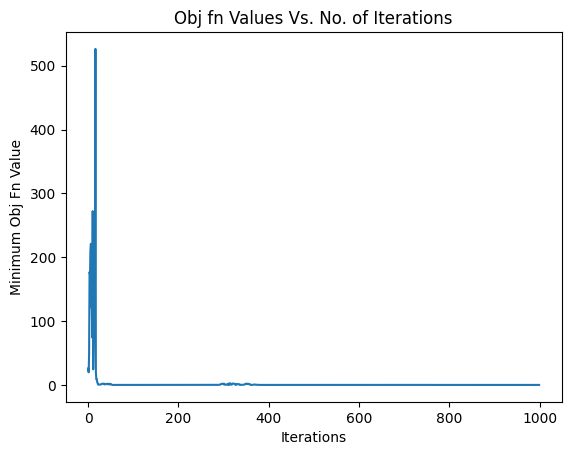

In [130]:
x = [i for i in range(iterations)]


#Generating a graph to find the difference between the obj fn values per each iteration
plt.plot(x,o_values)
plt.xlabel('Iterations')
plt.ylabel('Minimum Obj Fn Value')

plt.title('Obj fn Values Vs. No. of Iterations')
